In [85]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import os
import random

In [86]:
# Applying Motion Blur
def motion_blur(image, size=15):
    kernel = np.zeros((size, size))
    kernel[int((size-1)/2), :] = np.ones(size)
    kernel = kernel / size
    blurred = cv2.filter2D(image, -1, kernel)
    return blurred

In [87]:
# Applying Defocus Blur
def defocus_blur(image, size=15):
    kernel = np.zeros((size, size), np.uint8)
    cv2.circle(kernel, (size//2, size//2), size//3, 1, -1)
    kernel = kernel / np.sum(kernel)
    blurred = cv2.filter2D(image, -1, kernel)
    return blurred

In [88]:
# Applying Low Light Blur
def apply_low_light_blur(image, size=15, noise_level=5):
    blurred = motion_blur(image, size)
    noise = np.random.normal(1, noise_level, blurred.shape).astype(np.uint8)
    low_light_blurred = cv2.add(blurred, noise)
    return low_light_blurred

## Testing Different Blurring Techniques

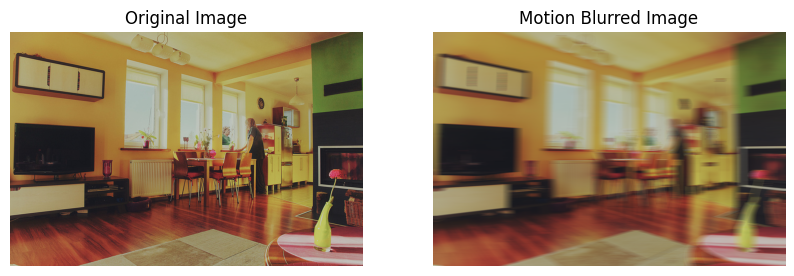

In [89]:
# Testing Motion Blur
img = cv2.imread('images/000000000139.jpg')
blurred_img = motion_blur(img, size=20)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.title('Original Image')
plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(blurred_img, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.title('Motion Blurred Image')
plt.show()

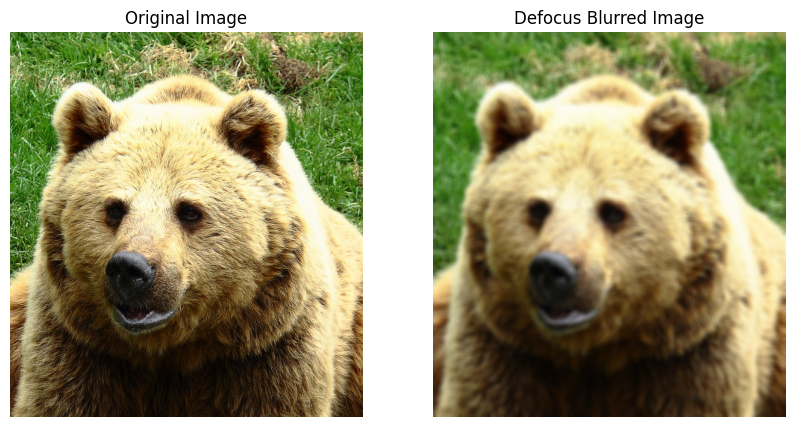

In [90]:
# Teestinf Defocus Blur
img = cv2.imread('images/000000000285.jpg')
blurred_img = defocus_blur(img, size=15)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.title('Original Image')
plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(blurred_img, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.title('Defocus Blurred Image')
plt.show()

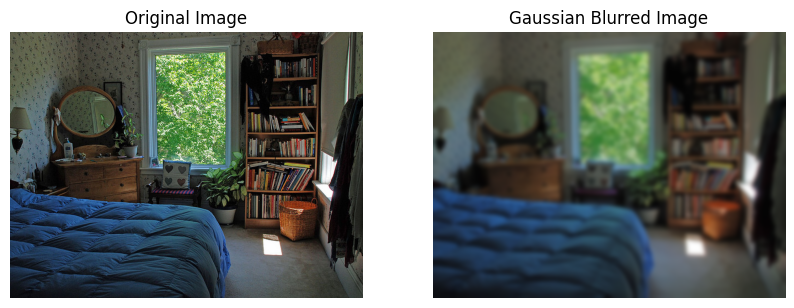

In [91]:
# Testng Gaussian Blur
img = cv2.imread('images/000000000632.jpg')
blurred_img = cv2.GaussianBlur(img, (0, 0), 4)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.title('Original Image')
plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(blurred_img, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.title('Gaussian Blurred Image')
plt.show()

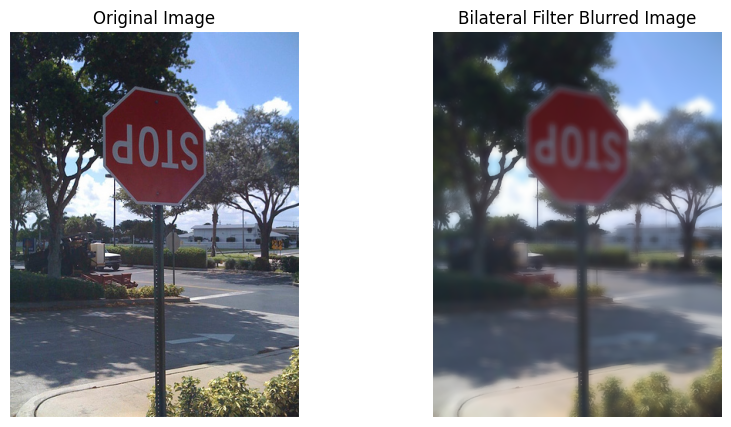

In [92]:
# Testing Bilateral Filter Blur
img = cv2.imread('images/000000000724.jpg')
blurred_img = cv2.bilateralFilter(img, 15, 300, 300)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.title('Original Image')
plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(blurred_img, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.title('Bilateral Filter Blurred Image')
plt.show()

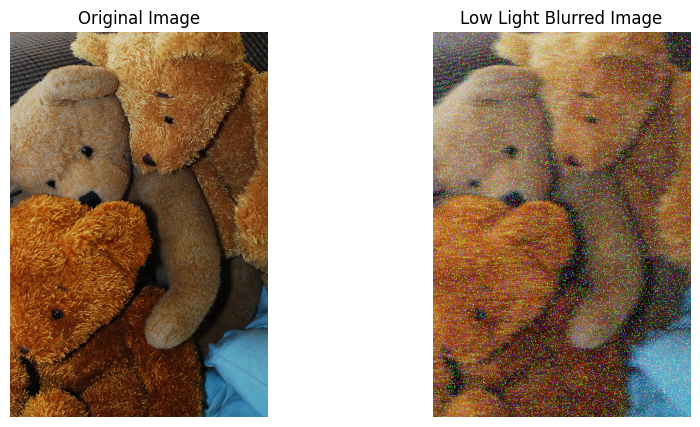

In [93]:
# Testing Low Light Blur
img = cv2.imread('images/000000000776.jpg')
blurred_img = apply_low_light_blur(img, 15, 1.5)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.title('Original Image')
plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(blurred_img, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.title('Low Light Blurred Image')
plt.show()

## Apply Random Blurring Techniques to All Images

In [94]:
folder_path = 'images/'  # Folder Path

for filename in os.listdir(folder_path):
    if filename.endswith('.jpg'):
        file_path = os.path.join(folder_path, filename)
        img = cv2.imread(file_path)  # Load the image file

        pick_blur = random.randint(0, 4)

        if pick_blur == 0:
            blurred = motion_blur(img, size=20)  # Apply motion blur
        elif pick_blur == 1:
            blurred = defocus_blur(img, size=15) # Apply defocus blur
        elif pick_blur == 2:
            blurred = cv2.GaussianBlur(img, (0, 0), 4) # Apply Gaussian blur
        elif pick_blur == 3:
            blurred = cv2.bilateralFilter(img, 15, 300, 300) # Apply bilateral filter
        elif pick_blur == 4:
            blurred = apply_low_light_blur(img, 15, 1.5) # Apply low light blur
            
        cv2.imwrite(os.path.join('blurred images/', filename), blurred)  # Save the blurred image